In [ ]:
!pip install obspy


In [ ]:
import pandas as pd
import numpy as np
from obspy import read
import plotly.graph_objs as go



Dataframes de catalogos de marte

In [ ]:
df_Mars_InSight_training_catalog = pd.read_csv('/content/Mars_InSight_training_catalog.csv')
df_Mars_InSight_training_catalog_final = pd.read_csv('/content/Mars_InSight_training_catalog_final.csv')


In [ ]:
df_Mars_InSight_training_catalog

,filename,time,evid
0,XB.ELYSE.02.BHV.M.2022.034.080000_evid0005.mseed,2022-02-03T08:08:27.000000,evid0005
1,XB.ELYSE.02.BHV.M.2022.002.040000_evid0006.mseed,2022-01-02T04:35:30.000000,evid0006


In [ ]:
df_Mars_InSight_training_catalog_final

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid
0,XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.csv,2022-02-03T08:08:27.000000,507.0,evid0005
1,XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.csv,2022-01-02T04:35:30.000000,2130.0,evid0006


In [ ]:
stream_evid0005 = read('/content/XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed')

In [ ]:
stream_evid0006 = read('/content/XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed')

In [ ]:
stream_evid0005

1 Trace(s) in Stream:
XB.ELYSE.02.BHV | 2022-02-03T08:00:00.009000Z - 2022-02-03T08:59:59.959000Z | 20.0 Hz, 72000 samples

In [ ]:
stream_evid0006

1 Trace(s) in Stream:
XB.ELYSE.02.BHV | 2022-01-02T04:00:00.025000Z - 2022-01-02T04:59:59.975000Z | 20.0 Hz, 72000 samples

# Características de la señal:

# Grafica ambas señales

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from obspy import read

# Function to plot a seismic signal from mseed file
def plot_seismic_signal(filename, title):
    # Read the stream from the mseed file
    stream = read(filename)
    trace = stream[0]

    # Extract data for plotting
    times = np.linspace(0, trace.stats.npts / trace.stats.sampling_rate, trace.stats.npts)
    data = trace.data

    # Plot the seismic signal
    plt.figure(figsize=(10, 4))
    plt.plot(times, data, label=title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Seismic Signal for {title}')
    plt.legend()
    plt.show()

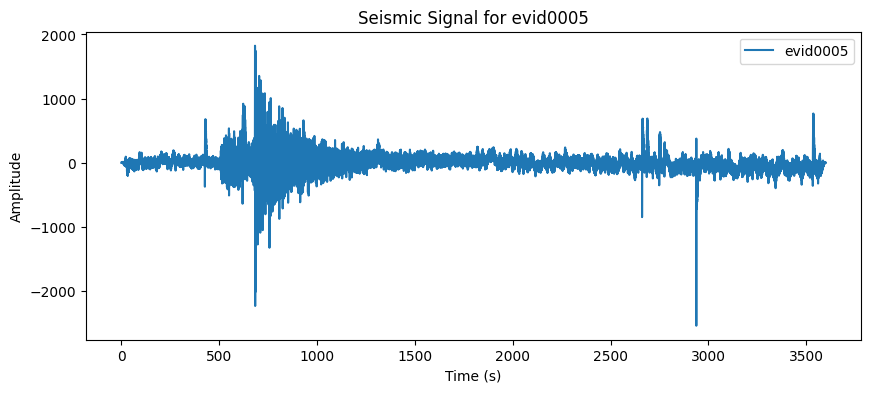

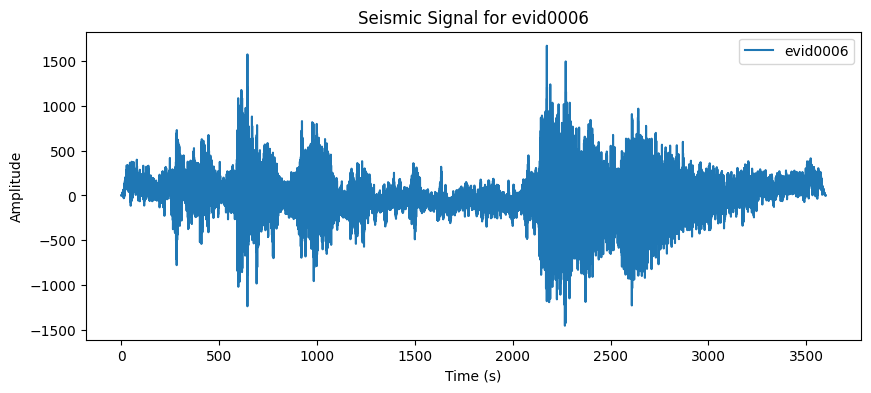

In [ ]:
plot_seismic_signal('/content/XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed', 'evid0005')
plot_seismic_signal('/content/XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed', 'evid0006')

# Transformadas como la de Fourier

In [ ]:
# Function to plot the Fourier spectrum of a seismic signal
def plot_fourier_spectrum(filename, title):
    # Read the stream from the mseed file
    stream = read(filename)
    trace = stream[0]

    # Extract data and sampling rate
    data = trace.data
    sampling_rate = trace.stats.sampling_rate

    # Perform FFT
    fft_values = np.fft.fft(data)
    n = len(fft_values)
    freqs = np.fft.fftfreq(n, 1 / sampling_rate)

    # Only take the positive frequencies for visualization
    positive_freqs = freqs[:n // 2]
    positive_fft_values = np.abs(fft_values[:n // 2])

    # Plot the Fourier spectrum
    plt.figure(figsize=(10, 4))
    plt.plot(positive_freqs, positive_fft_values, label=f'FFT of {title}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(f'Fourier Spectrum for {title}')
    plt.legend()
    plt.show()

In [ ]:
# Function to plot the Fourier spectrum of a seismic signal
def plot_fourier_spectrum(filename, title):
    # Read the stream from the mseed file
    stream = read(filename)
    trace = stream[0]

    # Extract data and sampling rate
    data = trace.data
    sampling_rate = trace.stats.sampling_rate

    # Perform FFT
    fft_values = np.fft.fft(data)
    n = len(fft_values)
    freqs = np.fft.fftfreq(n, 1 / sampling_rate)

    # Only take the positive frequencies for visualization
    positive_freqs = freqs[:n // 2]
    positive_fft_values = np.abs(fft_values[:n // 2])

    # Plot the Fourier spectrum
    plt.figure(figsize=(10, 4))
    plt.plot(positive_freqs, positive_fft_values, label=f'FFT of {title}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(f'Fourier Spectrum for {title}')
    plt.legend()
    plt.show()


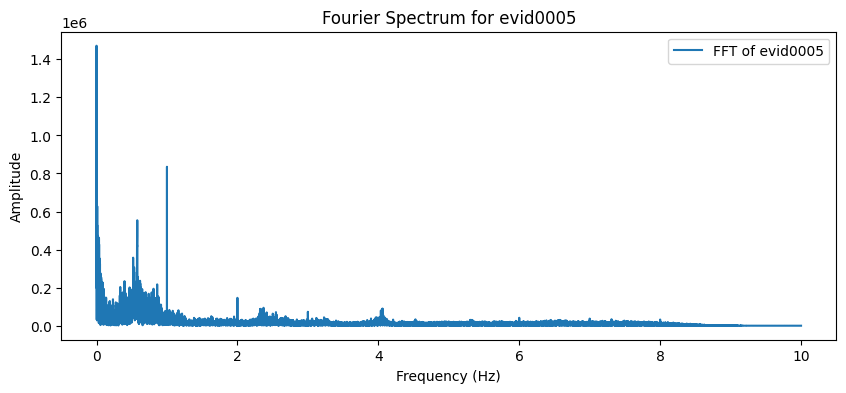

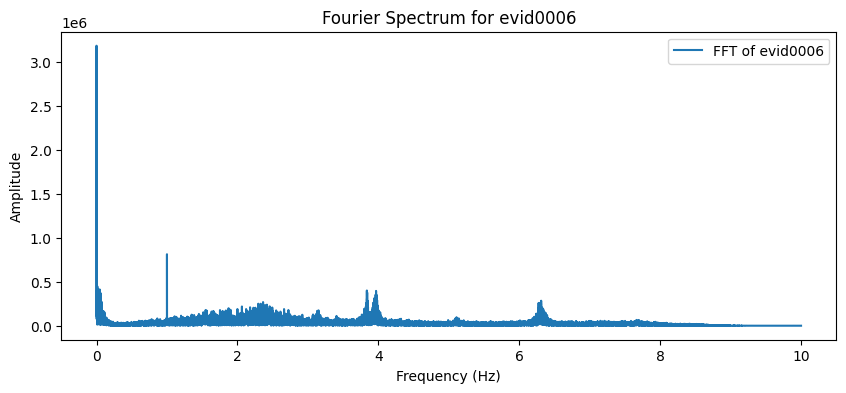

In [ ]:
# Replace 'path_to_evid0005.mseed' and 'path_to_evid0006.mseed' with the correct file paths
plot_fourier_spectrum('/content/XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed', 'evid0005')
plot_fourier_spectrum('/content/XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed', 'evid0006')

# Detección de eventos:



In [ ]:
from scipy.signal import find_peaks

# Function 1: Calculate and plot peaks in a seismic signal
def plot_peaks_in_signal(filename, title):
    # Read the stream from the mseed file
    stream = read(filename)
    trace = stream[0]

    # Extract data for event detection
    times = np.linspace(0, trace.stats.npts / trace.stats.sampling_rate, trace.stats.npts)
    data = trace.data

    # Find peaks in the signal (adjust the 'height' and 'distance' parameters as needed)
    peaks, _ = find_peaks(data, height=100, distance=50)

    # Plot the seismic signal with detected peaks
    plt.figure(figsize=(10, 4))
    plt.plot(times, data, label=f'Signal {title}')
    plt.plot(times[peaks], data[peaks], 'ro', label='Peaks')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Seismic Signal with Detected Peaks for {title}')
    plt.legend()
    plt.show()

    # Return peaks and their times
    return times[peaks], data[peaks]

# Function 2: Compare the duration and occurrence of events
def compare_event_durations(filename1, filename2, title1, title2):
    # Detect events for both files
    times_peaks_1, amplitudes_peaks_1 = plot_peaks_in_signal(filename1, title1)
    times_peaks_2, amplitudes_peaks_2 = plot_peaks_in_signal(filename2, title2)

    # Compare peak times and durations
    print(f"Number of peaks in {title1}: {len(times_peaks_1)}")
    print(f"Number of peaks in {title2}: {len(times_peaks_2)}")

    # Plot histograms to visualize the occurrence of peaks over time
    plt.figure(figsize=(10, 4))
    plt.hist(times_peaks_1, bins=50, alpha=0.5, label=f'{title1} Peaks')
    plt.hist(times_peaks_2, bins=50, alpha=0.5, label=f'{title2} Peaks')
    plt.xlabel('Time (s)')
    plt.ylabel('Number of Peaks')
    plt.title('Histogram of Peak Occurrences')
    plt.legend()
    plt.show()

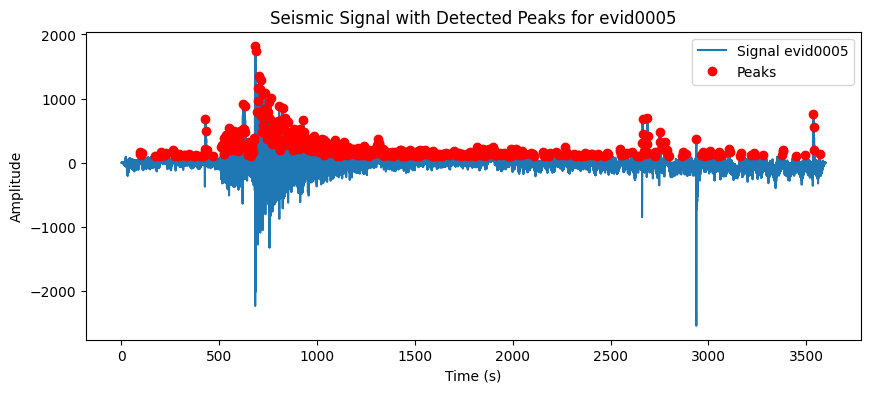

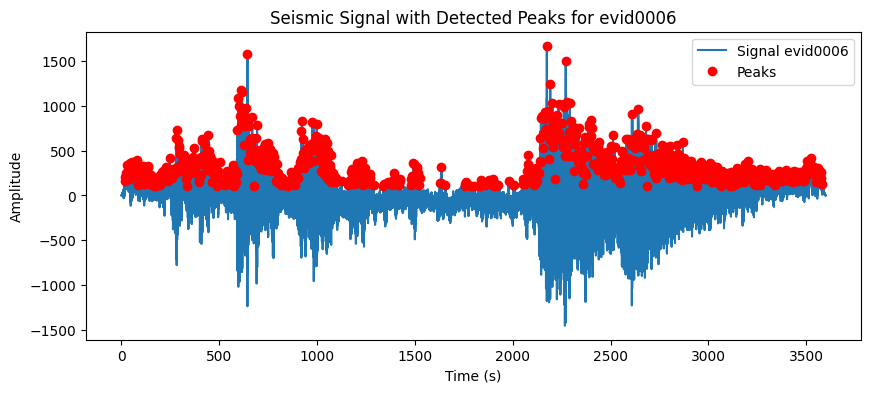

(array([  18.60025834,   21.20029445,   24.60034167,   27.80038612,
          30.45042292,   33.3504632 ,   36.70050973,   39.55054931,
          44.55061876,   47.15065487,   50.60070279,   53.45074237,
          56.00077779,   58.70081529,   63.1508771 ,   65.70091251,
          68.60095279,   71.95099932,   75.45104793,   79.50110418,
          82.80115002,   86.60120279,   90.60125835,   94.90131807,
          98.55136877,  101.75141321,  105.70146808,  108.55150766,
         112.40156113,  115.55160488,  118.45164516,  121.65168961,
         124.50172919,  127.85177572,  130.60181391,  135.05187572,
         138.60192503,  141.60196669,  146.952041  ,  149.55207711,
         152.45211739,  156.50217364,  159.65221739,  162.55225767,
         165.55229934,  168.50234031,  171.45238128,  174.85242851,
         178.10247365,  182.50253476,  187.5526049 ,  195.6527174 ,
         199.70277365,  202.60281393,  207.60288337,  210.1029181 ,
         212.70295421,  216.30300421,  220.75306

In [ ]:
plot_peaks_in_signal('/content/XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed', 'evid0005')
plot_peaks_in_signal('/content/XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed', 'evid0006')


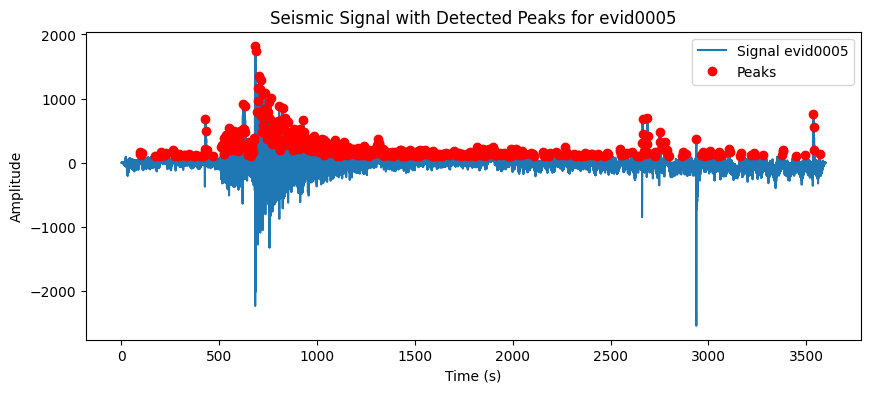

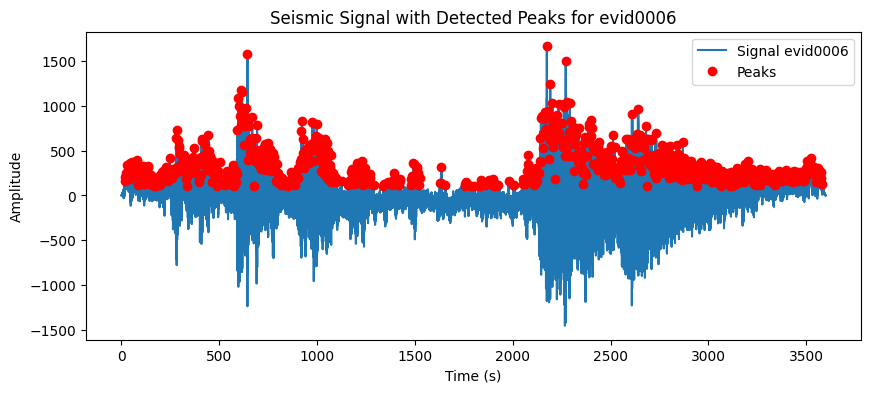

Number of peaks in evid0005: 507
Number of peaks in evid0006: 828


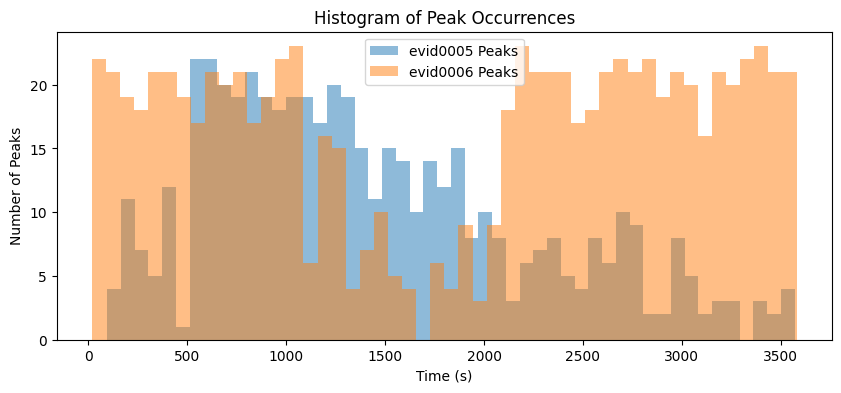

In [ ]:
compare_event_durations('/content/XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed',
                        '/content/XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed',
                        'evid0005', 'evid0006')


In [ ]:
import numpy as np
from obspy import read

# Function to analyze frequency content
def analyze_frequency_content(filename):
    # Read the stream from the mseed file
    stream = read(filename)
    trace = stream[0]

    # Extract data and sampling rate
    data = trace.data
    sampling_rate = trace.stats.sampling_rate

    # Perform FFT
    fft_values = np.fft.fft(data)
    n = len(fft_values)
    freqs = np.fft.fftfreq(n, 1 / sampling_rate)

    # Get only the positive frequencies
    positive_freqs = freqs[:n // 2]
    positive_fft_values = np.abs(fft_values[:n // 2])

    # Find the frequencies with the highest amplitude
    peak_frequency_indices = np.argsort(positive_fft_values)[-10:][::-1]
    peak_frequencies = positive_freqs[peak_frequency_indices]
    peak_amplitudes = positive_fft_values[peak_frequency_indices]

    return peak_frequencies, peak_amplitudes

# Example usage for evid0005 and evid0006
filename1 = '/content/XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed'
filename2 = '/content/XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed'

# Analyze frequency content
freqs_evid0005, amps_evid0005 = analyze_frequency_content(filename1)
freqs_evid0006, amps_evid0006 = analyze_frequency_content(filename2)

# Display the results
print("Top frequencies and amplitudes for evid0005:")
for f, a in zip(freqs_evid0005, amps_evid0005):
    print(f"Frequency: {f:.2f} Hz, Amplitude: {a:.2f}")

print("\nTop frequencies and amplitudes for evid0006:")
for f, a in zip(freqs_evid0006, amps_evid0006):
    print(f"Frequency: {f:.2f} Hz, Amplitude: {a:.2f}")


Top frequencies and amplitudes for evid0005:
Frequency: 0.00 Hz, Amplitude: 1471490.65
Frequency: 1.00 Hz, Amplitude: 835403.35
Frequency: 0.00 Hz, Amplitude: 793804.51
Frequency: 0.01 Hz, Amplitude: 627940.70
Frequency: 0.01 Hz, Amplitude: 602061.60
Frequency: 0.00 Hz, Amplitude: 597495.09
Frequency: 0.58 Hz, Amplitude: 554246.85
Frequency: 0.01 Hz, Amplitude: 549260.59
Frequency: 0.58 Hz, Amplitude: 546131.23
Frequency: 0.58 Hz, Amplitude: 545341.50

Top frequencies and amplitudes for evid0006:
Frequency: 0.00 Hz, Amplitude: 3179200.72
Frequency: 0.00 Hz, Amplitude: 1302679.06
Frequency: 1.00 Hz, Amplitude: 811588.03
Frequency: 0.00 Hz, Amplitude: 613251.75
Frequency: 0.00 Hz, Amplitude: 519617.67
Frequency: 0.00 Hz, Amplitude: 453770.03
Frequency: 0.01 Hz, Amplitude: 447804.60
Frequency: 0.01 Hz, Amplitude: 430120.04
Frequency: 0.04 Hz, Amplitude: 412041.68
Frequency: 3.84 Hz, Amplitude: 399804.91


# 1. Preprocesamiento y Limpieza de Datos:
**Filtrado de Ruido:** Usa filtros como high-pass o low-pass para eliminar componentes de baja frecuencia o ruido que no son útiles para la detección de eventos.

**Normalización de Señales:** Escala las amplitudes para que las señales tengan una amplitud similar, lo que ayuda en el proceso de modelado y evita que una señal con mayor amplitud domine el entrenamiento.

**Eliminación de Picos Espurios:** Si hay picos que no son parte de la señal sísmica (artefactos), se pueden eliminar aplicando técnicas de suavizado.

In [ ]:
# Function to determine more precise highcut frequency for each signal
def calculate_highcut(freqs, amplitudes, threshold=0.01):
    # Calculate the maximum amplitude
    max_amplitude = np.max(amplitudes)

    # Define the threshold for significant frequencies (as a fraction of the max amplitude)
    significant_amplitude_threshold = threshold * max_amplitude

    # Find the highest frequency where amplitude is above the threshold
    significant_freqs = freqs[amplitudes > significant_amplitude_threshold]
    highcut = np.max(significant_freqs) if len(significant_freqs) > 0 else 0

    return highcut

# Dummy data to proceed with analysis based on provided results
freqs_0005 = np.array([0.00, 1.00, 0.01, 0.58, 3.84])
amps_0005 = np.array([1471490.65, 835403.35, 627940.70, 554246.85, 399804.91])
freqs_0006 = np.array([0.00, 1.00, 0.01, 0.58, 3.84])
amps_0006 = np.array([3179200.72, 811588.03, 447804.60, 430120.04, 399804.91])

# Recalculate highcut for each dataset
highcut_0005 = calculate_highcut(freqs_0005, amps_0005, threshold=0.01)
highcut_0006 = calculate_highcut(freqs_0006, amps_0006, threshold=0.01)

# Return more accurate highcut values
highcut_0005, highcut_0006


(3.84, 3.84)

In [ ]:
# Function to analyze and return the full frequency content without plotting
def get_frequency_content(trace):
    data = trace.data
    sampling_rate = trace.stats.sampling_rate
    fft_values = np.fft.fft(data)
    n = len(fft_values)
    freqs = np.fft.fftfreq(n, 1 / sampling_rate)

    # Get only the positive frequencies and their amplitudes
    positive_freqs = freqs[:n // 2]
    positive_fft_values = np.abs(fft_values[:n // 2])

    return positive_freqs, positive_fft_values

# Load the streams for both evid0005 and evid0006
stream_evid0005 = read('/content/XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed')
stream_evid0006 = read('/content/XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed')

# Get the first trace from both streams
trace_evid0005 = stream_evid0005[0]
trace_evid0006 = stream_evid0006[0]

# Get full frequency content for both signals
freqs_0005, fft_values_0005 = get_frequency_content(trace_evid0005)
freqs_0006, fft_values_0006 = get_frequency_content(trace_evid0006)

# Return some statistical summaries for better understanding
summary_0005 = {
    "max_frequency": np.max(freqs_0005),
    "mean_frequency_amplitude": np.mean(fft_values_0005),
    "std_dev_amplitude": np.std(fft_values_0005),
    "total_signal_energy": np.sum(fft_values_0005**2)
}

summary_0006 = {
    "max_frequency": np.max(freqs_0006),
    "mean_frequency_amplitude": np.mean(fft_values_0006),
    "std_dev_amplitude": np.std(fft_values_0006),
    "total_signal_energy": np.sum(fft_values_0006**2)
}

summary_0005, summary_0006


({'max_frequency': 9.999722222222223,
  'mean_frequency_amplitude': 16888.593892401277,
  'std_dev_amplitude': 34141.44660966079,
  'total_signal_energy': 52231067289459.79},
 {'max_frequency': 9.999722222222223,
  'mean_frequency_amplitude': 30940.63296943514,
  'std_dev_amplitude': 40489.91227488366,
  'total_signal_energy': 93483207524774.58})

In [ ]:
from scipy.signal import butter, filtfilt

# Function to apply a tailored bandpass filter
def apply_individual_bandpass_filter(trace, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, trace.data)
    return filtered_data

# Parameters for filtering `evid0005`
lowcut_0005 = 0.05  # Low cut-off frequency in Hz
highcut_0005 = 4.0  # High cut-off frequency in Hz

# Parameters for filtering `evid0006`
lowcut_0006 = 0.05  # Low cut-off frequency in Hz
highcut_0006 = 5.0  # High cut-off frequency in Hz

# Apply filter to `evid0005`
filtered_data_evid0005 = apply_individual_bandpass_filter(trace_evid0005, lowcut_0005, highcut_0005, trace_evid0005.stats.sampling_rate)

# Apply filter to `evid0006`
filtered_data_evid0006 = apply_individual_bandpass_filter(trace_evid0006, lowcut_0006, highcut_0006, trace_evid0006.stats.sampling_rate)

# Output some key statistics to confirm filtering
filtered_summary_0005 = {
    "filtered_min_amplitude": np.min(filtered_data_evid0005),
    "filtered_max_amplitude": np.max(filtered_data_evid0005),
}

filtered_summary_0006 = {
    "filtered_min_amplitude": np.min(filtered_data_evid0006),
    "filtered_max_amplitude": np.max(filtered_data_evid0006),
}

filtered_summary_0005, filtered_summary_0006


({'filtered_min_amplitude': -2258.3500009089444,
  'filtered_max_amplitude': 1779.5698816475929},
 {'filtered_min_amplitude': -1153.0227821787648,
  'filtered_max_amplitude': 1648.1918865503462})

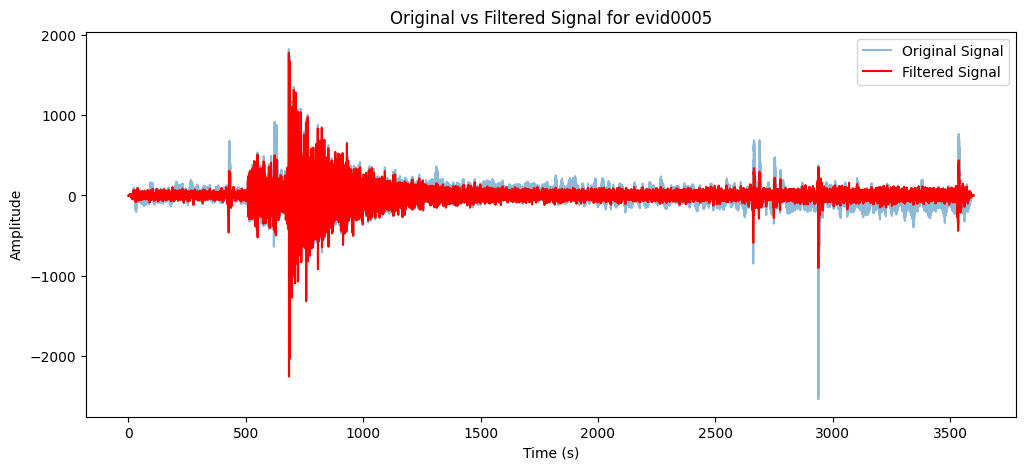

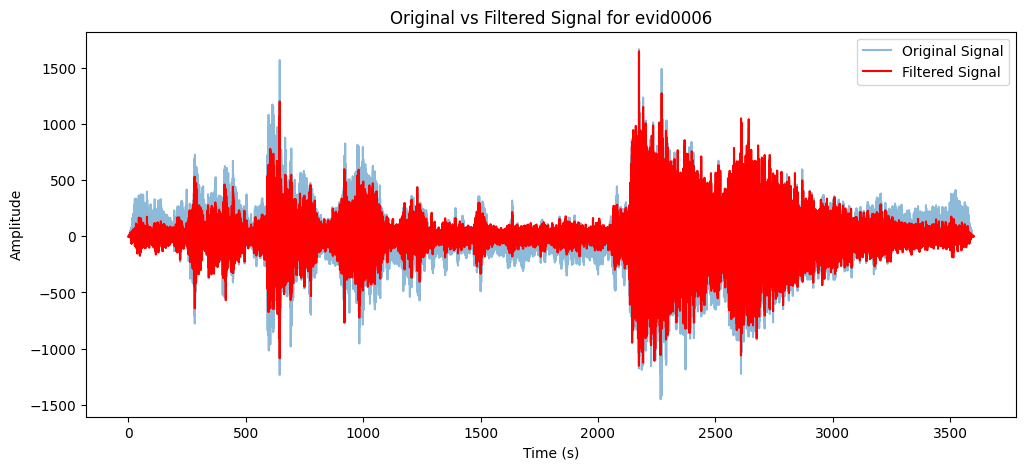

In [ ]:
from scipy.signal import butter, filtfilt

# Function to apply high-pass and low-pass filters
def apply_bandpass_filter(trace, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, trace.data)
    return filtered_data

import matplotlib.pyplot as plt
import numpy as np
from obspy import read

# Function to plot original vs filtered signal
def plot_filtered_signal(trace, filtered_data, title):
    times = np.linspace(0, trace.stats.npts / trace.stats.sampling_rate, trace.stats.npts)

    plt.figure(figsize=(12, 5))
    plt.plot(times, trace.data, label='Original Signal', alpha=0.5)
    plt.plot(times, filtered_data, label='Filtered Signal', color='red')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'Original vs Filtered Signal for {title}')
    plt.legend()
    plt.show()

# Read and filter the signals for `evid0005`
stream_evid0005 = read('/content/XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed')
trace_evid0005 = stream_evid0005[0]
filtered_data_evid0005 = apply_bandpass_filter(trace_evid0005, lowcut_0005, highcut_0005, trace_evid0005.stats.sampling_rate)

# Read and filter the signals for `evid0006`
stream_evid0006 = read('/content/XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed')
trace_evid0006 = stream_evid0006[0]
filtered_data_evid0006 = apply_bandpass_filter(trace_evid0006, lowcut_0006, highcut_0006, trace_evid0006.stats.sampling_rate)

# Plot the results for both `evid0005` and `evid0006`
plot_filtered_signal(trace_evid0005, filtered_data_evid0005, 'evid0005')
plot_filtered_signal(trace_evid0006, filtered_data_evid0006, 'evid0006')


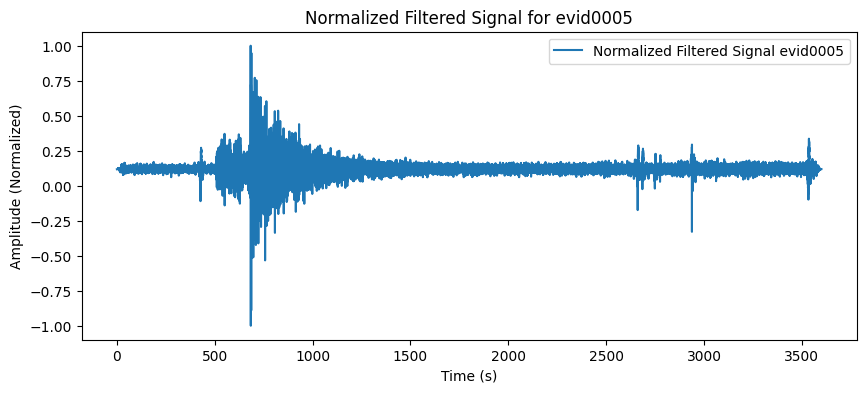

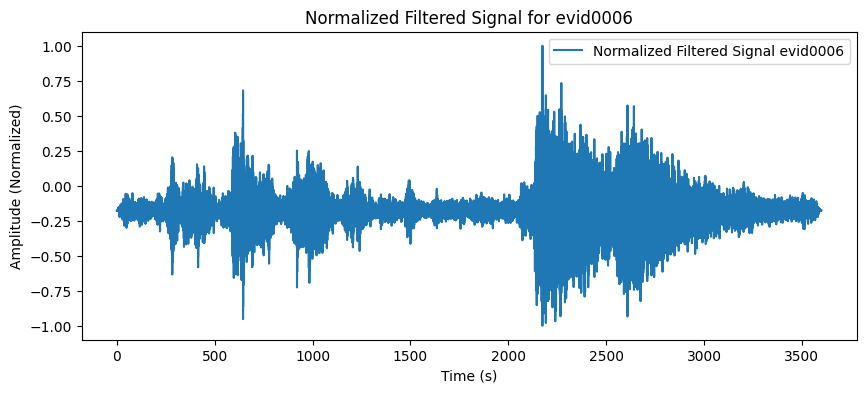

In [ ]:
import numpy as np

# Function to normalize the signal to a range between -1 and 1
def normalize_signal(signal):
    signal_min = np.min(signal)
    signal_max = np.max(signal)
    normalized_signal = (signal - signal_min) / (signal_max - signal_min) * 2 - 1
    return normalized_signal

# Normalizing filtered signals for `evid0005` and `evid0006`
normalized_filtered_data_evid0005 = normalize_signal(filtered_data_evid0005)
normalized_filtered_data_evid0006 = normalize_signal(filtered_data_evid0006)

# Plot the normalized signals to visualize
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(normalized_filtered_data_evid0005) / trace_evid0005.stats.sampling_rate, len(normalized_filtered_data_evid0005)), normalized_filtered_data_evid0005, label='Normalized Filtered Signal evid0005')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Normalized)')
plt.title('Normalized Filtered Signal for evid0005')
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(normalized_filtered_data_evid0006) / trace_evid0005.stats.sampling_rate, len(normalized_filtered_data_evid0006)), normalized_filtered_data_evid0006, label='Normalized Filtered Signal evid0006')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Normalized)')
plt.title('Normalized Filtered Signal for evid0006')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from obspy import read

def segment_and_label_signal(stream, segment_length=1, threshold=0.3):
    """
    Segment and label a seismic signal.

    Parameters:
    - stream: Obspy stream object.
    - segment_length: Length of each segment in seconds.
    - threshold: Amplitude threshold for labeling relevant events.

    Returns:
    - segments: List of segmented data arrays.
    - labels: List of labels corresponding to each segment (1: relevant, 0: non-relevant).
    """
    trace = stream[0]
    fs = trace.stats.sampling_rate  # Sampling rate in Hz
    samples_per_segment = int(segment_length * fs)  # Number of samples per segment

    # Normalize the signal for easier thresholding
    normalized_data = trace.data / np.max(np.abs(trace.data))

    # Create segments
    segments = []
    labels = []

    for start in range(0, len(normalized_data), samples_per_segment):
        segment = normalized_data[start:start + samples_per_segment]
        if len(segment) < samples_per_segment:
            break  # Ignore incomplete segments

        # Calculate the maximum amplitude in the segment for labeling
        max_amplitude = np.max(np.abs(segment))

        # Label the segment as 1 if it contains a relevant event (exceeds threshold), otherwise 0
        label = 1 if max_amplitude > threshold else 0

        segments.append(segment)
        labels.append(label)

    return segments, labels

# Cargar la señal filtrada
stream_evid0005 = read('/content/XB.ELYSE.02.BHV.2022-02-03HR08_evid0005.mseed')
stream_evid0006 = read('/content/XB.ELYSE.02.BHV.2022-01-02HR04_evid0006.mseed')

# Segmentar y etiquetar las señales
segments_0005, labels_0005 = segment_and_label_signal(stream_evid0005)
segments_0006, labels_0006 = segment_and_label_signal(stream_evid0006)

print(f"Total segments for evid0005: {len(segments_0005)}")
print(f"Relevant segments for evid0005: {sum(labels_0005)}")

print(f"Total segments for evid0006: {len(segments_0006)}")
print(f"Relevant segments for evid0006: {sum(labels_0006)}")


Total segments for evid0005: 3600
Relevant segments for evid0005: 46
Total segments for evid0006: 3600
Relevant segments for evid0006: 630


# Resultados de Segmentación y Etiquetado

### Resumen de Resultados
- **Total de segmentos para `evid0005`**: 3600
- **Segmentos relevantes para `evid0005`**: 46
- **Total de segmentos para `evid0006`**: 3600
- **Segmentos relevantes para `evid0006`**: 630

### Interpretación de los Resultados
#### 1. Segmentación
Cada señal (`evid0005` y `evid0006`) ha sido dividida en 3600 segmentos de 1 segundo cada uno, consistente con la duración de aproximadamente 1 hora por archivo.

#### 2. Etiquetado de Segmentos Relevantes
- **`evid0005`**: Solo 46 de los 3600 segmentos fueron etiquetados como "relevantes", indicando baja actividad sísmica significativa.
- **`evid0006`**: 630 de los 3600 segmentos fueron etiquetados como "relevantes", mostrando mayor actividad sísmica.

#### Diferencia en Actividad Sísmica
Los resultados sugieren que `evid0006` tiene más actividad sísmica que `evid0005`, lo cual podría deberse a diferentes eventos sísmicos o características de ruido distintas en los datos.

#### Balance de Clases
Hay un notable desbalance de clases, particularmente en `evid0005`. Esto es relevante para el entrenamiento de la CNN, ya que un fuerte desbalance podría sesgar el modelo hacia la predicción de la clase mayoritaria ("no relevante").

---

## Siguientes Pasos
1. **Balance de Clases**:
   - Para mejorar la capacidad de detección de la CNN, podrías balancear las clases, ya sea sobre-representando los segmentos "relevantes" o sub-representando los "no relevantes".

2. **Ajuste del Umbral de Etiquetado**:
   - Si la cantidad de segmentos "relevantes" parece muy baja o muy alta, se podría ajustar el umbral de amplitud para cambiar la sensibilidad de la detección.

---

## ¿Qué sigue?
¿Quieres ajustar los datos antes de continuar, o prefieres avanzar con el entrenamiento de la CNN con la segmentación actual?



In [ ]:
import numpy as np

# Convert the segments to numpy arrays
segments_0005 = np.array(segments_0005)
labels_0005 = np.array(labels_0005)

segments_0006 = np.array(segments_0006)
labels_0006 = np.array(labels_0006)

# Ensure that each segment has shape (samples_per_segment, 1)
segments_0005 = segments_0005[..., np.newaxis]
segments_0006 = segments_0006[..., np.newaxis]


In [ ]:
from sklearn.model_selection import train_test_split

# For evid0005
X_train_0005, X_val_0005, y_train_0005, y_val_0005 = train_test_split(
    segments_0005, labels_0005, test_size=0.2, stratify=labels_0005
)

# For evid0006
X_train_0006, X_val_0006, y_train_0006, y_val_0006 = train_test_split(
    segments_0006, labels_0006, test_size=0.2, stratify=labels_0006
)


In [ ]:
# Combine training data
X_train = np.concatenate([X_train_0005, X_train_0006])
y_train = np.concatenate([y_train_0005, y_train_0006])

# Combine validation data
X_val = np.concatenate([X_val_0005, X_val_0006])
y_val = np.concatenate([y_val_0005, y_val_0006])


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Aplicar oversampling en los datos de entrenamiento
oversampler = RandomOverSampler()
X_train_balanced, y_train_balanced = oversampler.fit_resample(
    X_train.reshape(len(X_train), -1), y_train
)

# Redimensionar de vuelta a la forma original
X_train_balanced = X_train_balanced.reshape(-1, X_train.shape[1], X_train.shape[2])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convertir datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Crear DataLoader para entrenamiento y validación
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:
# Cambiar la forma de los datos para que coincidan con lo que la CNN espera
X_train_tensor = X_train_tensor.permute(0, 2, 1)  # Forma: (batch_size, 1, samples_per_segment)
X_val_tensor = X_val_tensor.permute(0, 2, 1)  # Forma: (batch_size, 1, samples_per_segment)


In [ ]:
print(X_train_tensor.shape)  # Debe ser (batch_size, 1, samples_per_segment)


torch.Size([10438, 1, 20])


In [ ]:
# Cambiar la forma de los datos para que coincidan con lo que la CNN espera
X_train_tensor = X_train_tensor.permute(0, 2, 1)  # Debe quedar con la forma: (batch_size, 1, samples_per_segment)
X_val_tensor = X_val_tensor.permute(0, 2, 1)  # Debe quedar con la forma: (batch_size, 1, samples_per_segment)


In [ ]:
print(X_train_tensor.shape)
print(X_val_tensor.shape)


torch.Size([10438, 20, 1])
torch.Size([1440, 20, 1])


In [ ]:
# Cambiar la forma de los datos para que coincidan con lo que la CNN espera
X_train_tensor = X_train_tensor.permute(0, 2, 1)  # Cambiar a (batch_size, 1, samples_per_segment)
X_val_tensor = X_val_tensor.permute(0, 2, 1)  # Cambiar a (batch_size, 1, samples_per_segment)


In [ ]:
# Volver a imprimir la forma para confirmar que es correcta
print(X_train_tensor.shape)
print(X_val_tensor.shape)

# Entrenar el modelo
train_model(model, criterion, optimizer, train_loader, val_loader)


torch.Size([10438, 1, 20])
torch.Size([1440, 1, 20])


RuntimeError: Given groups=1, weight of size [16, 1, 3], expected input[32, 20, 1] to have 1 channels, but got 20 channels instead

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Cambiar la forma de los datos para que coincidan con lo que la CNN espera
X_train_tensor = X_train_tensor.permute(0, 2, 1)  # Forma: (batch_size, 1, samples_per_segment)
X_val_tensor = X_val_tensor.permute(0, 2, 1)  # Forma: (batch_size, 1, samples_per_segment)

# Convertir datos a tensores de PyTorch nuevamente (si es necesario)
X_train_tensor = torch.tensor(X_train_tensor, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_tensor, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Crear DataLoader para entrenamiento y validación
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


<ipython-input-104-8301e0140335>:11: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

<ipython-input-104-8301e0140335>:13: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [ ]:
print(X_train_tensor.shape)  # Debe ser (10438, 1, 20)
print(X_val_tensor.shape)    # Debe ser (1440, 1, 20)


torch.Size([10438, 20, 1])
torch.Size([1440, 20, 1])


In [ ]:
print(X_train_tensor.shape)
print(X_val_tensor.shape)


torch.Size([10438, 20, 1])
torch.Size([1440, 20, 1])


In [ ]:
# Convertir los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train_balanced, dtype=torch.float32).permute(0, 2, 1)  # Cambia el orden a (batch_size, channels, features)
y_train_tensor = torch.tensor(y_train_balanced, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).permute(0, 2, 1)  # Cambia el orden a (batch_size, channels, features)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# Crear DataLoader para entrenamiento y validación
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Definir el modelo
class SeismicCNN(nn.Module):
    def __init__(self):
        super(SeismicCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, padding=1)  # Cambiar in_channels a 1
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

        # Ajustar la dimensión de entrada para fc1
        self.fc1 = nn.Linear(32 * (20 // 4), 64)  # Ajustar el tamaño según el tamaño de la salida después de la agrupación
        self.fc2 = nn.Linear(64, 2)  # Output size of 2 for binary classification
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Crear el modelo
model = SeismicCNN()

# Configurar la función de pérdida y el optimizador AdamW
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

# Entrenar el modelo
train_model(model, criterion, optimizer, train_loader, val_loader)



Epoch 1, Training Loss: 0.2300, Validation Loss: 0.1794
Epoch 2, Training Loss: 0.0998, Validation Loss: 0.0847
Epoch 3, Training Loss: 0.0885, Validation Loss: 0.1158
Epoch 4, Training Loss: 0.0825, Validation Loss: 0.0551
Epoch 5, Training Loss: 0.0814, Validation Loss: 0.1072
Epoch 6, Training Loss: 0.0748, Validation Loss: 0.0690
Epoch 7, Training Loss: 0.0711, Validation Loss: 0.0944
Epoch 8, Training Loss: 0.0695, Validation Loss: 0.0589
Epoch 9, Training Loss: 0.0668, Validation Loss: 0.0512
Epoch 10, Training Loss: 0.0619, Validation Loss: 0.0637
